In [8]:
from IPython.display import Audio
import librosa
import os

In [9]:
def cut_song(song):
    start = 0
    end = len(song)
    song_pieces = []
    while start + 100000 < end:
        song_pieces.append(song[start:start+100000])
        start += 100000
    return song_pieces

def prepare_song(song_path):
    list_matrices = []
    y,sr = librosa.load(song_path,sr=22050)
    song_pieces = cut_song(y)
    for song_piece in song_pieces:
        melspec = librosa.feature.melspectrogram(song_piece)
        list_matrices.append(melspec)
    return list_matrices

In [10]:
all_tracks = []
genre = []
directory = 'C:\\Users\\Morten\\Desktop\\School\\Bachelor\\ModelFirstTry\\Tool\\ænima'

for song_name in os.listdir(directory):
    song_pieces = prepare_song(directory + '/' + song_name)
    all_tracks += song_pieces
    genre += ([0]*len(song_pieces))
    print(f"Finished: {song_name}")

directory = 'C:\\Users\\Morten\\Desktop\\School\\Bachelor\\ModelFirstTry\\Tool\\Lateralus'
for song_name in os.listdir(directory):
    song_pieces = prepare_song(directory + '/' + song_name)
    all_tracks += song_pieces
    genre += ([0]*len(song_pieces))
    print(f"Finished: {song_name}")

C:\Users\Morten\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Finished: 02 - eulogy.mp3


C:\Users\Morten\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Finished: 03 - h..mp3
Finished: 04 - useful idiot.mp3
Finished: 05 - forty six & 2.mp3
Finished: 06 - message to harry manback.mp3
Finished: 07 - hooker with a penis.mp3
Finished: 08 - intermission.mp3
Finished: 09 - jimmy.mp3
Finished: 10 - die eier von satan.mp3
Finished: 11 - pushit.mp3
Finished: 12 - cesaro summability.mp3
Finished: 13 - ænema.mp3
Finished: 14 - (-) ions.mp3
Finished: 15 - third eye.mp3
Finished: 01 - the grudge.mp3
Finished: 02 - eon blue apocalypse.mp3
Finished: 03 - the patient.mp3
Finished: 04 - the mantra.mp3
Finished: 05 - schism.mp3
Finished: 06 - parabol.mp3
Finished: 07 - parabola.mp3
Finished: 08 - ticks & leeches.mp3
Finished: 12 - triad.mp3
Finished: 13 - faap de oaid.mp3


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(np.array(all_tracks),
                                                    np.array(genre),
                                                    test_size=0.33,
                                                    random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test, 
                                                test_size=0.5,
                                                random_state=42)

X_train = X_train.reshape(1108, 128, 196,1)
X_val = X_val.reshape(273, 128, 196,1)
X_test = X_test.reshape(274, 128, 196,1)
print(X_test.shape)


(274, 128, 196)


In [40]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 196, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 194, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 97, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 95, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 47, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 45, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 80640)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [34]:
from tensorflow.keras.optimizers import RMSprop

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val))

Epoch 1/10
35/35 [==============================] - 17s 496ms/step - loss: 0.2669 - accuracy: 0.9801 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
35/35 [==============================] - 19s 540ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
35/35 [==============================] - 19s 542ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
35/35 [==============================] - 18s 522ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
35/35 [==============================] - 19s 540ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
35/35 [==============================] - 17s 494ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
35/35 [==============================] - 20s 568ms/step - loss: 0.0000e+00 - accuracy: 

ValueError: in user code:

    C:\Users\Morten\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\Morten\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Morten\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Morten\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Morten\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Morten\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\Morten\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\Users\Morten\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Morten\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 128, 196]


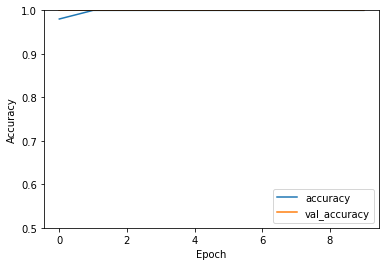

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)